In [41]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

TASK_GOALS = {
    'up': [0.15, 0.0, 0.0],
    'down': [-0.15, 0.0, 0.0],
    'left': [0.0, 0.15, 0.0],
    'right': [0.0, -0.15, 0.0]
}

single_tasks_data_folder = "/home/hejia/Downloads/data_pusher/single_tasks"

single_tasks_data_dirs = os.walk(single_tasks_data_folder)

single_tasks_data = []

for f in ['up', 'down', 'left', 'right']:
    exp_data = np.load(os.path.join(single_tasks_data_folder, f + '.npy')).item()
    exp_data['name'] = f
    exp_data['target'] = np.array([0.64, 0.22, 0.03]) \
                                + np.array(TASK_GOALS[exp_data['name']])
    single_tasks_data.append(exp_data)

print('Loaded {} single tasks EXP data.'.format(len(single_tasks_data)))

Loaded 4 single tasks EXP data.


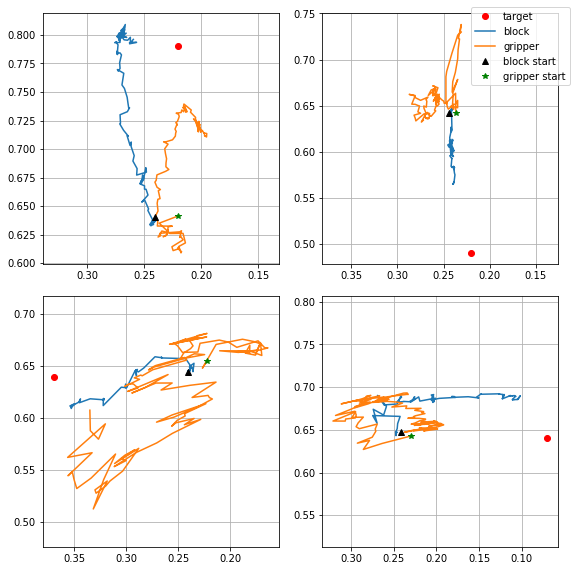

In [146]:
import numpy as np
import matplotlib.pyplot as plt

MAX_SAMPLES = 120

def get_block_rollout(env_infos):
    block_rollout = [[], []]
    for env_info in env_infos:
        block_rollout[0].append(env_info['object_pos'][0])
        block_rollout[1].append(env_info['object_pos'][1])
    return np.array(block_rollout)

def get_gripper_rollout(env_infos):
    gripper_rollout = [[], []]
    for env_info in env_infos:
        gripper_rollout[0].append(env_info['gripper_pos'][0])
        gripper_rollout[1].append(env_info['gripper_pos'][1])
    return np.array(gripper_rollout)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].plot(single_tasks_data[0]['target'][1], single_tasks_data[0]['target'][0], 'ro', label='target')
block_rollout = get_block_rollout(single_tasks_data[0]['env_infos'])
gripper_rollout = get_gripper_rollout(single_tasks_data[0]['env_infos'])
axes[0, 0].axis('equal')
axes[0, 0].plot(block_rollout[1][:MAX_SAMPLES] - 0.015 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] - 0.034 * np.ones(MAX_SAMPLES), label='block')
axes[0, 0].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES], label='gripper')
block_start = np.array([block_rollout[1][0] - 0.015, block_rollout[0][0] - 0.034])
axes[0, 0].plot(block_start[0], block_start[1], 'k^', label='block start')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[0, 0].plot(gripper_start[0], gripper_start[1], 'g*', label='gripper start')
axes[0, 0].invert_xaxis()
axes[0, 0].grid()
    
axes[0, 1].plot(single_tasks_data[1]['target'][1], single_tasks_data[1]['target'][0], 'ro')
block_rollout = get_block_rollout(single_tasks_data[1]['env_infos'])
gripper_rollout = get_gripper_rollout(single_tasks_data[1]['env_infos'])
axes[0, 1].axis('equal')
axes[0, 1].plot(block_rollout[1][:MAX_SAMPLES] - 0.04 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] - 0.04 * np.ones(MAX_SAMPLES))
axes[0, 1].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES])
block_start = np.array([block_rollout[1][0] - 0.04, block_rollout[0][0] - 0.04])
axes[0, 1].plot(block_start[0], block_start[1], 'k^')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[0, 1].plot(gripper_start[0], gripper_start[1], 'g*')
axes[0, 1].invert_xaxis()
axes[0, 1].grid()
    
axes[1, 0].plot(single_tasks_data[2]['target'][1], single_tasks_data[2]['target'][0], 'ro')
block_rollout = get_block_rollout(single_tasks_data[2]['env_infos'])
gripper_rollout = get_gripper_rollout(single_tasks_data[2]['env_infos'])
axes[1, 0].axis('equal')
axes[1, 0].plot(block_rollout[1][:MAX_SAMPLES] - 0.044 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] - 0.03 * np.ones(MAX_SAMPLES))
axes[1, 0].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES])
block_start = np.array([block_rollout[1][0] - 0.044, block_rollout[0][0] - 0.03])
axes[1, 0].plot(block_start[0], block_start[1], 'k^')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[1, 0].plot(gripper_start[0], gripper_start[1], 'g*')
axes[1, 0].invert_xaxis()
axes[1, 0].grid()

    
axes[1, 1].plot(single_tasks_data[3]['target'][1], single_tasks_data[3]['target'][0], 'ro')
block_rollout = get_block_rollout(single_tasks_data[3]['env_infos'])
gripper_rollout = get_gripper_rollout(single_tasks_data[3]['env_infos'])
axes[1, 1].axis('equal')
axes[1, 1].plot(block_rollout[1][:MAX_SAMPLES] - 0.04 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] - 0.03 * np.ones(MAX_SAMPLES))
axes[1, 1].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES])
block_start = np.array([block_rollout[1][0] - 0.044, block_rollout[0][0] - 0.03])
axes[1, 1].plot(block_start[0], block_start[1], 'k^')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[1, 1].plot(gripper_start[0], gripper_start[1], 'g*')
axes[1, 1].invert_xaxis()
axes[1, 1].grid()

# axes[0, 0].legend()
fig.legend(loc=(0.82, 0.85))
fig.tight_layout()

In [122]:
import pickle
import os
import copy
import numpy as np
import matplotlib

# Avoid type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

TASK_GOALS = {
    'up_left': [0.1, 0.1, 0.0],
    'down_left': [-0.1, 0.1, 0.0],
    'down_right': [-0.1, 0.1, 0.0],
    'up_right': [0.1, -0.1, 0.0]
}

average_mean_data_folder = "/home/hejia/Downloads/data_pusher/average_mean"

average_mean_tasks_data_dirs = os.walk(average_mean_data_folder)

average_mean_tasks_data = []

for f in ['up_left', 'down_left', 'down_right', 'up_right']:
    exp_data = np.load(os.path.join(average_mean_data_folder, f + '.npy')).item()
    exp_data['name'] = f
    exp_data['target'] = np.array([0.64, 0.22, 0.03]) \
                            + np.array(TASK_GOALS[exp_data['name']])
    average_mean_tasks_data.append(exp_data)

print('Loaded {} average_mean tasks EXP data.'.format(len(average_mean_tasks_data)))

Loaded 4 average_mean tasks EXP data.


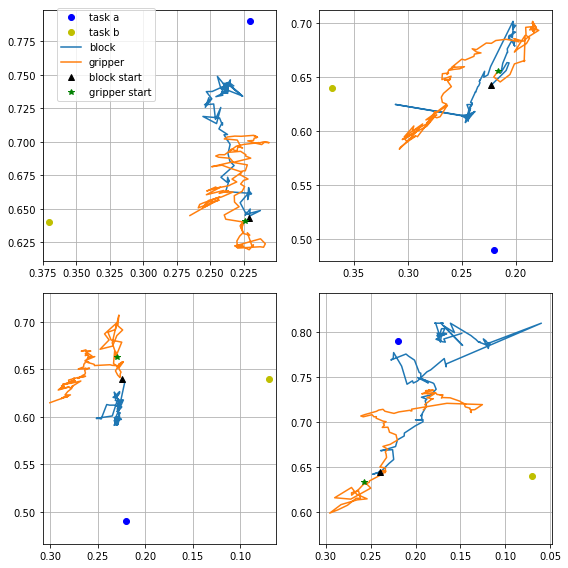

In [178]:
import numpy as np
import matplotlib.pyplot as plt

MAX_SAMPLES = 120

def get_block_rollout(env_infos):
    block_rollout = [[], []]
    for env_info in env_infos:
        # filter some noise induced by vicon system.
        block_rollout[0].append(min(0.8, env_info['object_pos'][0]))
        block_rollout[1].append(max(0.1, env_info['object_pos'][1]))
    return np.array(block_rollout)

def get_gripper_rollout(env_infos):
    gripper_rollout = [[], []]
    for env_info in env_infos:
        gripper_rollout[0].append(env_info['gripper_pos'][0])
        gripper_rollout[1].append(env_info['gripper_pos'][1])
    return np.array(gripper_rollout)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].plot(single_tasks_data[0]['target'][1], single_tasks_data[0]['target'][0], 'bo', label='task a')
axes[0, 0].plot(single_tasks_data[2]['target'][1], single_tasks_data[2]['target'][0], 'yo', label='task b')
block_rollout = get_block_rollout(average_mean_tasks_data[0]['env_infos'])
gripper_rollout = get_gripper_rollout(average_mean_tasks_data[0]['env_infos'])
axes[0, 0].axis('equal')
axes[0, 0].plot(block_rollout[1][:MAX_SAMPLES] - 0.02 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] - 0.02 * np.ones(MAX_SAMPLES), label='block')
axes[0, 0].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES], label='gripper')
block_start = np.array([block_rollout[1][0] - 0.02, block_rollout[0][0] - 0.02])
axes[0, 0].plot(block_start[0], block_start[1], 'k^', label='block start')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[0, 0].plot(gripper_start[0], gripper_start[1], 'g*', label='gripper start')
axes[0, 0].invert_xaxis()
axes[0, 0].grid()
    
axes[0, 1].plot(single_tasks_data[1]['target'][1], single_tasks_data[1]['target'][0], 'bo')
axes[0, 1].plot(single_tasks_data[2]['target'][1], single_tasks_data[2]['target'][0], 'yo')
block_rollout = get_block_rollout(average_mean_tasks_data[1]['env_infos'])
gripper_rollout = get_gripper_rollout(average_mean_tasks_data[1]['env_infos'])
axes[0, 1].axis('equal')
axes[0, 1].plot(block_rollout[1][:MAX_SAMPLES] - 0.01 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] - 0.05 * np.ones(MAX_SAMPLES))
axes[0, 1].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES])
block_start = np.array([block_rollout[1][0] - 0.01, block_rollout[0][0] - 0.05])
axes[0, 1].plot(block_start[0], block_start[1], 'k^')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[0, 1].plot(gripper_start[0], gripper_start[1], 'g*')
axes[0, 1].invert_xaxis()
axes[0, 1].grid()

axes[1, 0].plot(single_tasks_data[1]['target'][1], single_tasks_data[1]['target'][0], 'bo')
axes[1, 0].plot(single_tasks_data[3]['target'][1], single_tasks_data[3]['target'][0], 'yo')
block_rollout = get_block_rollout(average_mean_tasks_data[2]['env_infos'])
gripper_rollout = get_gripper_rollout(average_mean_tasks_data[2]['env_infos'])
axes[1, 0].axis('equal')
axes[1, 0].plot(block_rollout[1][:MAX_SAMPLES] - 0.03 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES])
axes[1, 0].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES])
block_start = np.array([block_rollout[1][0] - 0.03, block_rollout[0][0]])
axes[1, 0].plot(block_start[0], block_start[1], 'k^')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[1, 0].plot(gripper_start[0], gripper_start[1], 'g*')
axes[1, 0].invert_xaxis()
axes[1, 0].grid()

axes[1, 1].plot(single_tasks_data[0]['target'][1], single_tasks_data[0]['target'][0], 'bo')
axes[1, 1].plot(single_tasks_data[3]['target'][1], single_tasks_data[3]['target'][0], 'yo')
block_rollout = get_block_rollout(average_mean_tasks_data[3]['env_infos'])
gripper_rollout = get_gripper_rollout(average_mean_tasks_data[3]['env_infos'])
axes[1, 1].axis('equal')
axes[1, 1].plot(block_rollout[1][:MAX_SAMPLES] - 0.04 * np.ones(MAX_SAMPLES), block_rollout[0][:MAX_SAMPLES] + 0.01 * np.ones(MAX_SAMPLES))
axes[1, 1].plot(gripper_rollout[1][:MAX_SAMPLES], gripper_rollout[0][:MAX_SAMPLES])
block_start = np.array([block_rollout[1][0] - 0.04, block_rollout[0][0] + 0.01])
axes[1, 1].plot(block_start[0], block_start[1], 'k^')
gripper_start = np.array([gripper_rollout[1][0], gripper_rollout[0][0]])
axes[1, 1].plot(gripper_start[0], gripper_start[1], 'g*')
axes[1, 1].invert_xaxis()
axes[1, 1].grid()

fig.legend(loc=(0.1, 0.82))
fig.tight_layout()